# Homework 5

### deadline: Sunday, 01/12/24, 23:59

features of winequality-red.csv:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

labels:
- quality

In [46]:
# import packages

# basics
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

path = '.\HW5_plots'
if not os.path.exists(path):
    os.makedirs(path)

# data preprocessing
from sklearn.model_selection import train_test_split    # for splitting into training and test sets
from sklearn.preprocessing import StandardScaler        # for scaling of features

# packages for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

<>:10: SyntaxWarning: invalid escape sequence '\H'
<>:10: SyntaxWarning: invalid escape sequence '\H'
C:\Users\josep\AppData\Local\Temp\ipykernel_22656\2894109990.py:10: SyntaxWarning: invalid escape sequence '\H'
  path = '.\HW5_plots'


In [47]:
# load and copy the dataset

df = pd.read_csv('winequality-red.csv')
wine_df = df.copy()
wine_df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
# get rid of column 'quality'


wine_qualitys = wine_df.drop('quality', axis=1)
wine_quality = list(wine_df['quality'])

In [49]:
# split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(wine_features, wine_quality, test_size=0.2, random_state=77)
X, y = wine_features, wine_quality      # rename features and quality indices of whole data set to X and y (more clear in context of transformations)

X_train.head()
X.head()
# list(X_train.columns)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
# standardisation of features of X_train, X_test and wine_qualitys

wine_scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

all_columns = list(X_train.columns)

X_train[all_columns] = wine_scaler.fit_transform(X_train[all_columns])
X_test[all_columns] = wine_scaler.transform(X_test[all_columns])

X_standardized = X.copy()
X_standardized[all_columns] = wine_scaler.fit_transform(X_standardized[all_columns])

X_train.head()
X_standardized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [51]:
# for column in all_columns:
# i = 0
# for column in all_columns:
#     mean = X_train[i].mean()
#     std = X_train[i].std()
#     print(f"Column '{column}': mean = {mean}\nstd = {std}")
#     i =+ 1

## PCA

In [ ]:
# use PCA to reduce to 2 components

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

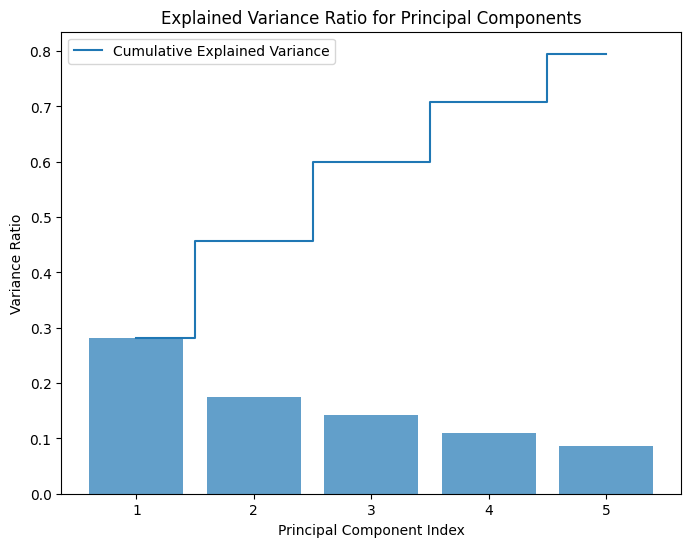

In [93]:
# Plot the explained variance ratio
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')
plt.legend()
plt.show()

In [53]:
# create a discrete colormap for the plots
cmap = plt.cm.jet  # Use jet or reverset jet (jet_r) colormap

# define bins and normalization
bounds = np.linspace(1, 8, 9)  # 8 intervals to include edges [1, 2, ..., 8]
norm = mpl.colors.BoundaryNorm(bounds, ncolors=cmap.N, clip=True)

<>:10: SyntaxWarning: invalid escape sequence '\H'
<>:11: SyntaxWarning: invalid escape sequence '\H'
<>:10: SyntaxWarning: invalid escape sequence '\H'
<>:11: SyntaxWarning: invalid escape sequence '\H'
C:\Users\josep\AppData\Local\Temp\ipykernel_22656\289036153.py:10: SyntaxWarning: invalid escape sequence '\H'
  plt.savefig(".\HW5_plots\plot_PCA.svg")
C:\Users\josep\AppData\Local\Temp\ipykernel_22656\289036153.py:11: SyntaxWarning: invalid escape sequence '\H'
  plt.savefig(".\HW5_plots\plot_PCA.png")


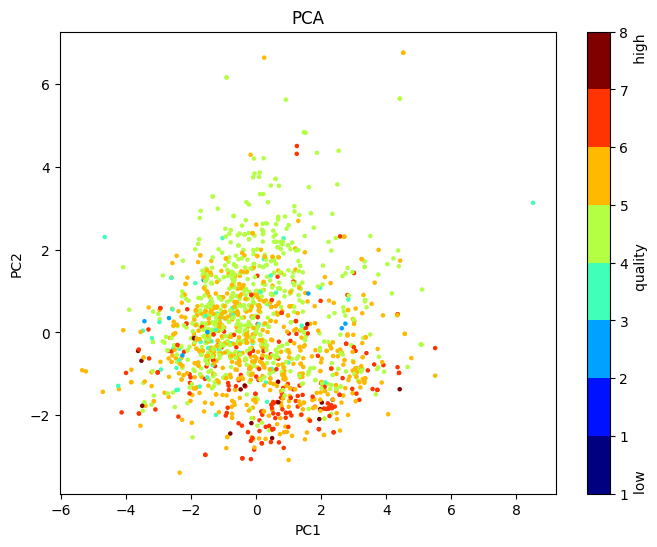

In [54]:
# plot PC1 and PC2
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cmap, norm=norm, marker='o', s=5)    # alright cmap 'RdYlGn'
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cmap, norm=norm, marker='o', s=5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.colorbar(label='low                                         quality                                         high', \
             cmap=cmap, norm=norm, spacing='uniform', ticks=bounds, boundaries=bounds, format='%li')
plt.savefig(".\HW5_plots\plot_PCA.svg")
plt.savefig(".\HW5_plots\plot_PCA.png")
plt.show()

## t-SNE

In [91]:
# use t-SNE to reduce to 2 components

tSNE = TSNE(n_components=2, perplexity=50, random_state=77)

# non-standardised data
X_tSNE = tSNE.fit_transform(X)

# standardised data
X_standardized_tSNe = tSNE.fit_transform(X_standardized)

<>:9: SyntaxWarning: invalid escape sequence '\H'
<>:10: SyntaxWarning: invalid escape sequence '\H'
<>:9: SyntaxWarning: invalid escape sequence '\H'
<>:10: SyntaxWarning: invalid escape sequence '\H'
C:\Users\josep\AppData\Local\Temp\ipykernel_22656\733205027.py:9: SyntaxWarning: invalid escape sequence '\H'
  plt.savefig(".\HW5_plots\plot_t-SNE.svg")
C:\Users\josep\AppData\Local\Temp\ipykernel_22656\733205027.py:10: SyntaxWarning: invalid escape sequence '\H'
  plt.savefig(".\HW5_plots\plot_t-SNE.png")


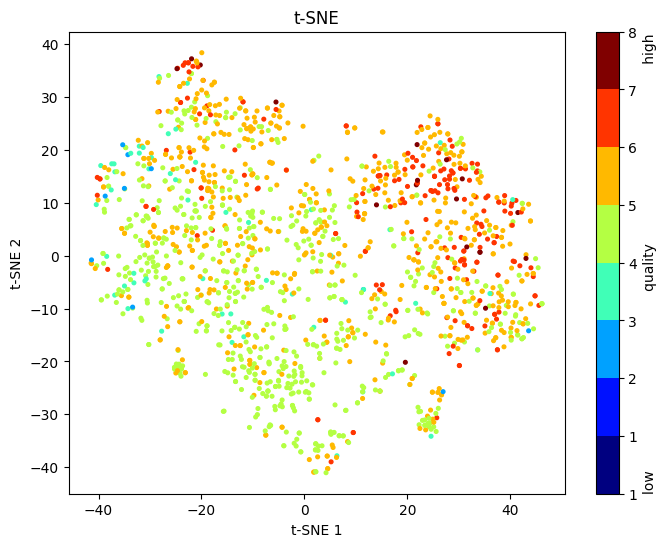

In [92]:
# plot components of t-SNE - standardised
plt.figure(figsize=(8, 6))
plt.scatter(X_standardized_tSNe[:, 0], X_standardized_tSNe[:, 1], c=y, cmap=cmap, norm=norm, marker='o', s=7)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE')
plt.colorbar(label='low                                         quality                                         high', \
             cmap=cmap, norm=norm, spacing='uniform', ticks=bounds, boundaries=bounds, format='%li')
plt.savefig(".\HW5_plots\plot_t-SNE.svg")
plt.savefig(".\HW5_plots\plot_t-SNE.png")
plt.show()

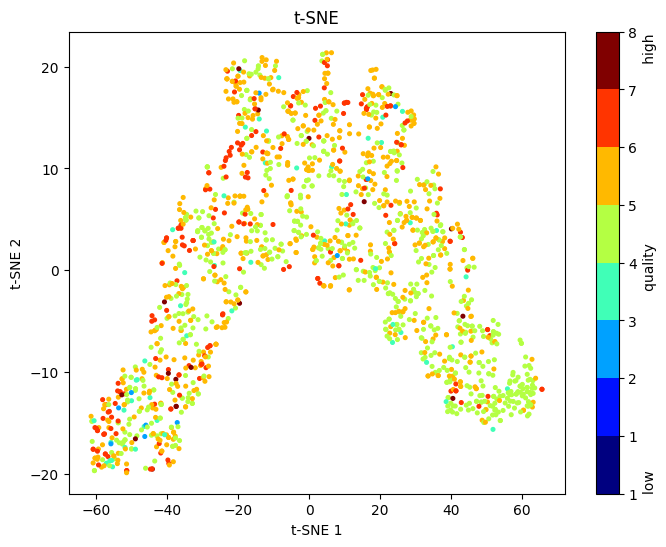

In [57]:
# plot components of t-SNE - non-standardised
plt.figure(figsize=(8, 6))
plt.scatter(X_tSNE[:, 0], X_tSNE[:, 1], c=y, cmap=cmap, norm=norm, marker='o', s=7)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE')
plt.colorbar(label='low                                         quality                                         high', \
             cmap=cmap, norm=norm, spacing='uniform', ticks=bounds, boundaries=bounds, format='%li')
plt.show()

## UMAP

In [82]:
# use UMAP to reduce to 2 components

umap_reducer = umap.UMAP(n_neighbors=5, n_components=2)

# non-standardised data
X_train_UMAP = umap_reducer.fit_transform(X_train)
X_test_UMAP = umap_reducer.transform(X_test)



<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\H'
<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\H'
C:\Users\josep\AppData\Local\Temp\ipykernel_22656\1368224492.py:10: SyntaxWarning: invalid escape sequence '\p'
  plt.savefig("HW5_plots\plot_UMAP.svg")
C:\Users\josep\AppData\Local\Temp\ipykernel_22656\1368224492.py:11: SyntaxWarning: invalid escape sequence '\H'
  plt.savefig(".\HW5_plots\plot_UMAP.png")


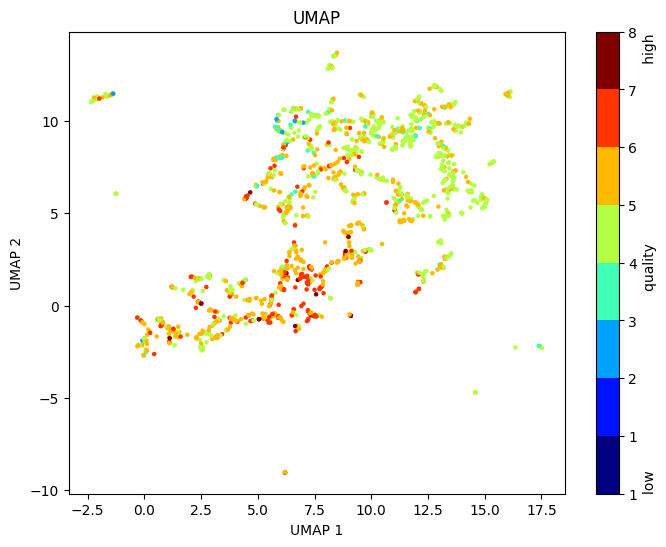

In [ ]:

# plot the two UMAP coordinates
plt.figure(figsize=(8, 6))
plt.scatter(X_train_UMAP[:, 0], X_train_UMAP[:, 1], c=y_train, cmap=cmap, norm=norm, marker='o', s=5)
plt.scatter(X_test_UMAP[:, 0], X_test_UMAP[:, 1], c=y_test, cmap=cmap, norm=norm, marker='o', s=5)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP')
plt.colorbar(label='low                                         quality                                         high', \
             cmap=cmap, norm=norm, spacing='uniform', ticks=bounds, boundaries=bounds, format='%li')
plt.savefig("HW5_plots\plot_UMAP.svg")
plt.savefig(".\HW5_plots\plot_UMAP.png")
plt.show()

## Statistical Test

**Hypothesis:**
Wines with lower residual sugar tend to have higher quality ratings.

In [132]:
from scipy.stats import ttest_ind
import statsmodels.api as sm

# make another copy the dataframe
df_for_t_test = df.copy()
wine_quality = df_for_t_test['quality']
# df_for_t_test = df_for_t_test.drop('quality', axis=1)

df_for_t_test.columns
# df_for_t_test['quality'].median()


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

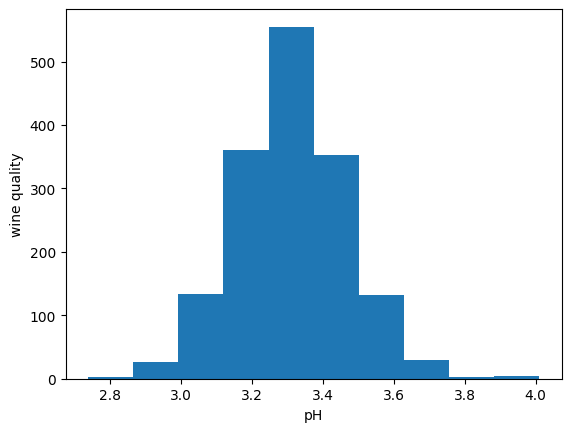

pH: min = 2.74, median = 3.31, max = 4.01


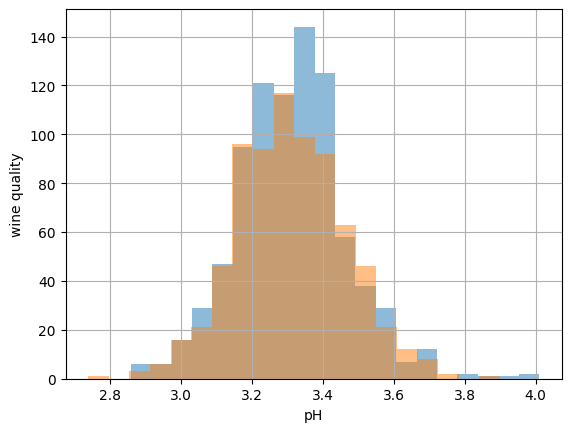

np.float64(3.31)

In [151]:
# plot histograms
plt.hist(df_for_t_test['pH'])
plt.xlabel('pH')
plt.ylabel('wine quality')
plt.show()

quality_median = wine_quality.median()
quality_max = wine_quality.max()
quality_min = wine_quality.min()

pH_min = df_for_t_test['pH'].min()
pH_median = df_for_t_test['pH'].median()
pH_max = df_for_t_test['pH'].max()

print(f"pH: min = {pH_min}, median = {pH_median}, max = {pH_max}")

df_for_t_test[df_for_t_test['quality'] >= quality_median]['pH'].hist(alpha=0.5, bins=20)
df_for_t_test[df_for_t_test['quality'] < quality_median]['pH'].hist(alpha=0.5, bins=20)
plt.xlabel('pH')
plt.ylabel('wine quality')
# plt.legend(['No disease', 'Disease'])
plt.show()

pH_median

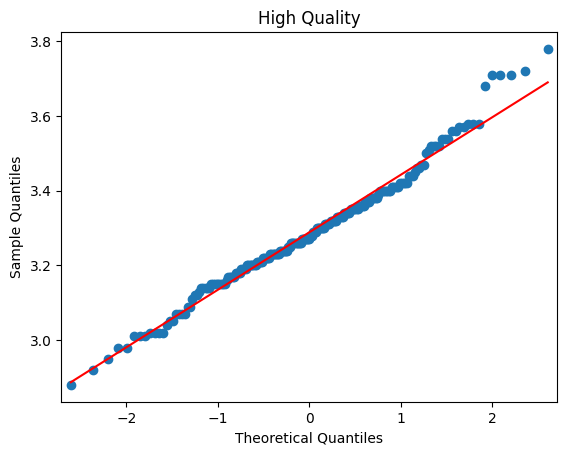

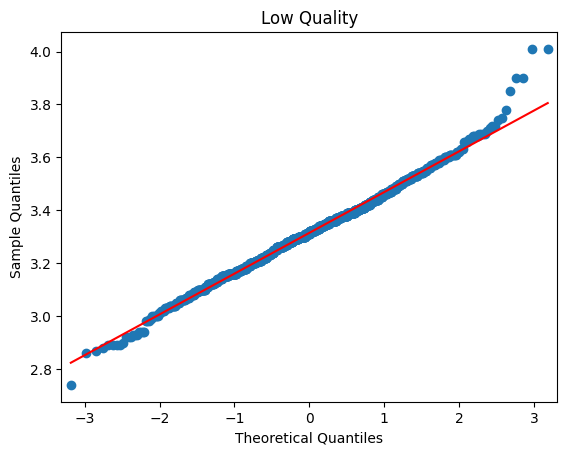

In [154]:
# --> if the data is normally distributed, the points should be on the red line

# Define high quality as 'quality' > quality_median

sm.qqplot(df_for_t_test[df_for_t_test['quality'] > quality_median]['pH'], line='s')
plt.title('High Quality')
sm.qqplot(df_for_t_test[df_for_t_test['quality'] <= quality_median]['pH'], line='s')
plt.title('Low Quality')
plt.show()

### t-Test

**Null-Hypothesis**

H0 = The alcohol levels does not significantly affect the quality of the wine.\
H1 = Wines with higher alcohol levels tend to have higher quality ratings.

In [157]:
feature_list = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                'pH', 'sulphates', 'alcohol', 'quality']

significant_feature = []
insignificant_feature = []

significant_quality = []
insignificant_quality = []

for test_feature in feature_list:


# Create two groups: low and high quality

    low_quality_group = df_for_t_test[df_for_t_test['quality'] <= quality_median][test_feature]
    high_quality_group = df_for_t_test[df_for_t_test['quality'] > quality_median][test_feature]

    # Perform an independent t-test
    t_stat_quality, p_value_quality = ttest_ind(low_quality_group, high_quality_group)
    
    # Print the results
    print(f"{test_feature}:")
    print(f"Grouping by feature: T-Statistic: {t_stat_quality}, P-Value: {p_value_quality}\n")

    # Interpret the results
    if p_value_quality < 0.05:
        significant_quality.append(test_feature)
    else:
        insignificant_quality.append(test_feature)

    
# Create two groups: low and high values of feature

    # Define the threshold for low and high amounts of the test_feature

    threshold = df_for_t_test[test_feature].median()

    low_group = df_for_t_test[df_for_t_test[test_feature] <= threshold]['quality']
    high_group = df_for_t_test[df_for_t_test[test_feature] > threshold]['quality']

    # Perform an independent t-test
    t_stat_feature, p_value_feature = ttest_ind(low_group, high_group)


    # Print the results
    print(f"{test_feature}:")
    print(f"Grouping by feature: T-Statistic: {t_stat_feature}, P-Value: {p_value_feature}\n")

    # Interpret the results
    if p_value_feature < 0.05:
        significant_feature.append(test_feature)
    else:
        insignificant_feature.append(test_feature)


print(f"Reject the null hypothesis: The features {significant_quality} likely affect wine quality.")
print(f"Reject the null hypothesis: The features {significant_feature} likely affect wine quality.")
print(f"Fail to reject the null hypothesis: No significant difference in quality based on the features {insignificant_quality}.")
print(f"Fail to reject the null hypothesis: No significant difference in quality based on the features {insignificant_feature}.")

fixed acidity:
Grouping by feature: T-Statistic: -4.8328960963052, P-Value: 1.4748688383383466e-06

fixed acidity:
Grouping by feature: T-Statistic: -4.234281304854521, P-Value: 2.4235009544147174e-05

volatile acidity:
Grouping by feature: T-Statistic: 11.237923111478523, P-Value: 2.9578633809350365e-28

volatile acidity:
Grouping by feature: T-Statistic: 12.955317739059026, P-Value: 1.4232768243922547e-36

citric acid:
Grouping by feature: T-Statistic: -8.785474791138187, P-Value: 3.9347797379848406e-18

citric acid:
Grouping by feature: T-Statistic: -10.588006531762085, P-Value: 2.295922033146121e-25

residual sugar:
Grouping by feature: T-Statistic: -1.9115483882007416, P-Value: 0.056112960300893584

residual sugar:
Grouping by feature: T-Statistic: -1.595478795393869, P-Value: 0.1108030659296721

chlorides:
Grouping by feature: T-Statistic: 3.907196963164431, P-Value: 9.727196360395434e-05

chlorides:
Grouping by feature: T-Statistic: 6.5307431302445424, P-Value: 8.771011908788004

In [159]:
test_feature = 'pH'


# Create two groups: low and high quality

low_quality_group = df_for_t_test[df_for_t_test['quality'] <= quality_median][test_feature]
high_quality_group = df_for_t_test[df_for_t_test['quality'] > quality_median][test_feature]

# Perform an independent t-test
t_stat_quality, p_value_quality = ttest_ind(low_quality_group, high_quality_group)

# Print the results
print(f"{test_feature}:")
print(f"Grouping by feature: T-Statistic: {t_stat_quality}, P-Value: {p_value_quality}\n")

# Interpret the results
if p_value_quality < 0.05:
    print(f"Reject the null hypothesis: The feature {test_feature} likely affects wine quality.")
else:
    print(f"Fail to reject the null hypothesis: No significant difference in quality based on the feature {test_feature}.")
    
    
# # Create two groups: low and high values of feature

# # Define the threshold for low and high amounts of the test_feature

# threshold = df_for_t_test[test_feature].median()

# low_group = df_for_t_test[df_for_t_test[test_feature] <= threshold]['quality']
# high_group = df_for_t_test[df_for_t_test[test_feature] > threshold]['quality']

# # Perform an independent t-test
# t_stat_feature, p_value_feature = ttest_ind(low_group, high_group)


# # Print the results
# print(f"{test_feature}:")
# print(f"Grouping by feature: T-Statistic: {t_stat_feature}, P-Value: {p_value_feature}\n")

# # Interpret the results
# if p_value_feature < 0.05:
#     print(f"Reject the null hypothesis: The features {significant_feature} likely affects wine quality.")
# else:
#     print(f"Fail to reject the null hypothesis: No significant difference in quality based on the feature {insignificant_feature}.")



pH:
Grouping by feature: T-Statistic: 2.292949742323404, P-Value: 0.02198034398691512

Reject the null hypothesis: The feature pH likely affects wine quality.


### To Do:

**Task 1/2**
- ~~load dataset, drop "quality" column~~
- ~~split into test, train and validation set~~
- ~~apply dimensionality reduction to all remaining features --> 2 dim~~
  - ~~PCA~~ &emsp; <span style="color:green">*Q: Does it make sense to normalise ALL columns?? A: Yes!*</span>
  - ~~t-SNE~~ 
  - ~~UMAP (--> [UMAP documentation](https://umap-learn.readthedocs.io/en/latest/basic_usage.html))~~
- ~~plot the features for each of the three methods (--> using quality column to color code the recorded points)~~

**Task 2/2**
- come up with hypothesis regarding wine features and wine quality (i.e., one feature contributes significantly to wine quality)
- apply statisticacl test (my choice) to investigate if hypothesis is true

**PDF**
1. screenshots of the 3 plots
2. my hypothesis
3. chosen statistical test and explanation why I chose it
4. conclusions, including p-value